# Assignment 1 

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords

In [ ]:
import pandas as pd
import numpy as np
import re   
import string

In [ ]:
data = pd.read_csv("tweets-dataset.csv",encoding = 'utf-8', header = None)
#print(data.head)
lista= data.values.tolist()


In [ ]:
from matplotlib import pyplot as plt

In [ ]:
from nltk.tokenize import TweetTokenizer


tz = TweetTokenizer(strip_handles= True)

In [ ]:
#print(lista[:20])


In [178]:
for i in lista[:20]:
    # i = i.translate(None, string.punctuation)
    #,print(i)
    i = re.sub(r"http\S+", "", i[0])
    i = re.sub(r"@\S+", "", i)
    i = re.sub(r"[0-9]+","",i)
    

    translate_table = dict((ord(char), None) for char in string.punctuation)
    
    i = i.translate(translate_table)
    
    tokens = tz.tokenize(i)
    
    #print(tokens)
    len_tok = len(tokens)
    len_type = len(set(tokens))
    #print(len_type / len_tok)

In [180]:
listfull = []
X = []
Y = []
k = 0

main_dict = dict()
t = 0
for i in lista:
    i = re.sub(r"http\S+", "", i[0])
    i = re.sub(r"@\S+", "", i)
    i = re.sub(r"[0-9]+","",i)
    i = i.lower()
    translate_table = dict((ord(char), None) for char in string.punctuation)
    i = i.translate(translate_table)
    tokens = tz.tokenize(i)
    #tokens = i.split()
    
    listfull = listfull + tokens
    for i in tokens:
        if i in main_dict:
            main_dict[i]+=1
        else:
            main_dict[i] = 1
    if t<40:
        X.append(len(listfull))
        Y.append(len(set(listfull)))
    t+=1
    if t==40:
        t=0
    #print(k)
    k+=1
    
#print(main_dict)

# TTR(type to token ratio)

In [181]:
types = list(set(listfull))
ttr = len(types)/len(listfull)
print('ttr',ttr)
len(listfull)


ttr 0.11535774434922896


296287

# Heap's Law

In [ ]:
#print(main_dict)

In [182]:
from scipy.optimize import curve_fit 
def test2(x,a,b):
    return(a*(x)**b)
param, param_cov = curve_fit(test2, X, Y) 
ans = []
for i in X:
    ans.append(param[0]*(i)**param[1])
print(param[0],param[1])             # Y = KN^B

13.306903973184864 0.6237926688966955


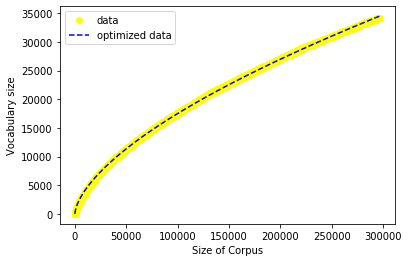

In [183]:
plt.plot(X, Y, 'o', color ='yellow', label ="data") 
plt.plot(X, ans, '--', color ='blue', label ="optimized data") 
plt.xlabel("Size of Corpus")
plt.ylabel("Vocabulary size")
plt.legend() 
plt.show() 


# Zipf's law of meaning

In [184]:
from nltk.corpus import wordnet   #Import wordnet from the NLTK

No handles with labels found to put in legend.


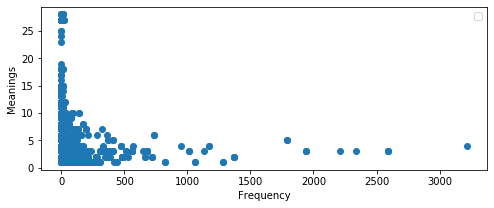

In [189]:
import random
import math
words = random.choices(types, k=60000)
words.sort()
#print(words)
dict2 = dict()
x_new=[]
y_new=[]
for i in words:
    dict2[i] = wordnet.synsets(i)
    sy = wordnet.synsets(i)
    
    if len(sy)>0:                    #if the word exists in wordnet
        x_new.append(main_dict[i])
        y_new.append(len(sy[0].lemmas()))

def sort_list(list1, list2): 
  
    zipped_pairs = zip(list2, list1) 
  
    z = [x for _, x in sorted(zipped_pairs)] 
      
    return z 

y_new = sort_list(y_new,x_new)
x_new.sort()
        
plt.figure(figsize=(8,3))
plt.xlabel("Frequency")
plt.ylabel("Meanings")
plt.scatter(x_new,y_new)

plt.legend() 
plt.show() 
    


# Zipf's law of length

No handles with labels found to put in legend.


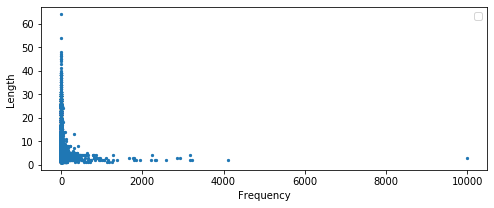

In [186]:
from scipy.optimize import curve_fit 

x_len = []
y_freq = []

for k in types:

    x_len.append(len(k)) 
    y_freq.append(main_dict[k])


param, param_cov = curve_fit(test_1, x_len, y_freq) 
predicted = []
for i in x_len:
    predicted.append(param[0]/i)

plt.figure(figsize=(8,3))

plt.scatter( y_freq,x_len, s = 5)
#plt.plot(predicted, x_len, color = 'black')

plt.xlabel("Frequency")
plt.ylabel("Length ")
plt.legend() 
plt.show() 

    